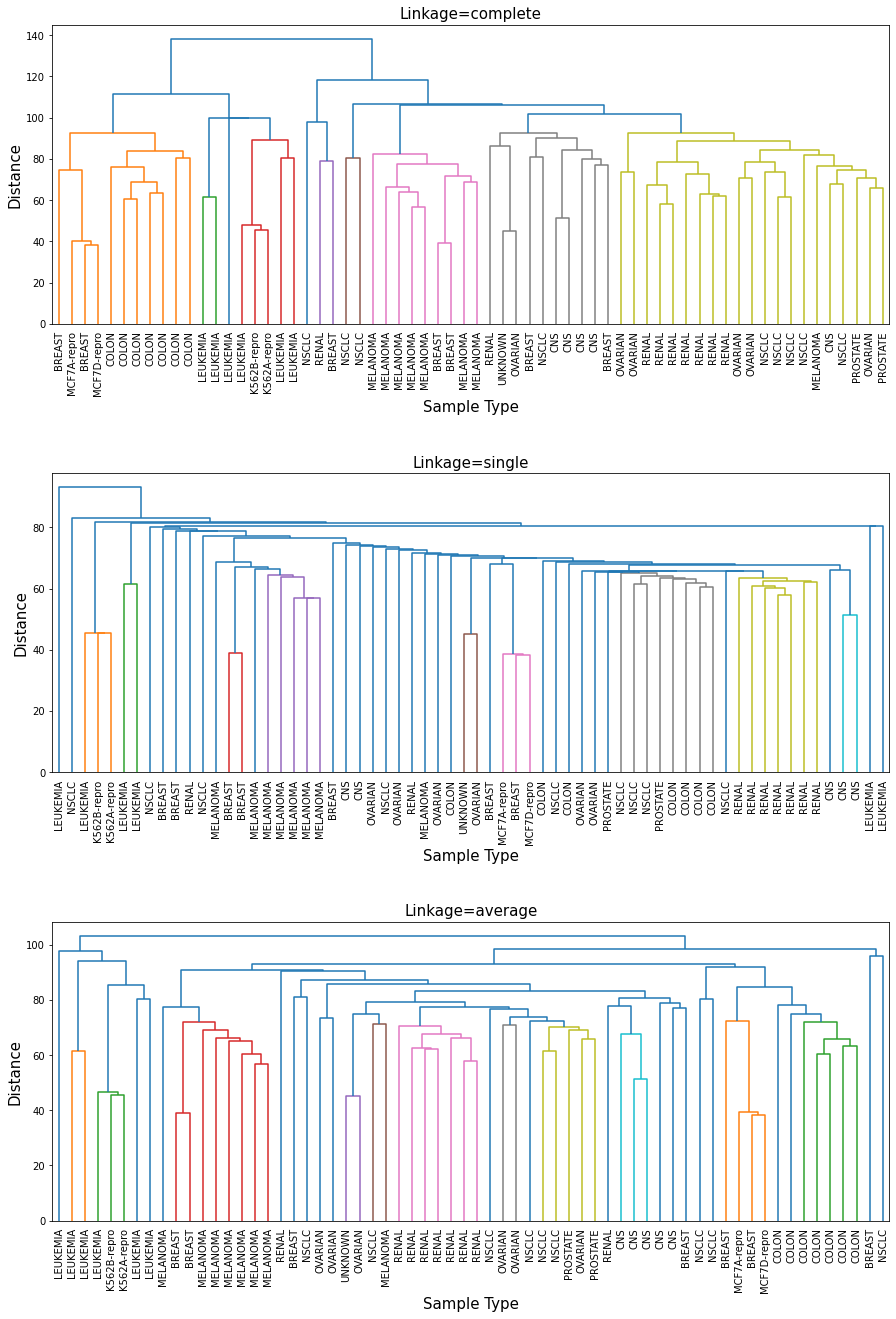

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

nci_data = pd.read_csv("NCI60_data.csv", index_col=0)
nci_labs = pd.read_csv('NCI60_labs.csv', index_col=0)

nci_data.index = nci_labs.x

fig, ax = plt.subplots(3,1, figsize=(15,22))
fig.subplots_adjust(hspace=0.5)

linkages = ['complete', 'single', 'average']
for link, axis in zip(linkages, fig.axes):
    hc = linkage(y = nci_data, method=link, metric='euclidean') 
    axis.set_title("Linkage=%s" % link, size=15)
    axis.set_xlabel('Sample Type', size=15)
    axis.set_ylabel('Distance', size=15)
    dendrogram(hc, ax=axis, labels=nci_data.index, leaf_rotation=90, leaf_font_size=10)


The results from the single linkage are less than ideal. Avarage and complete have clustered the data better. 

In [15]:
from scipy.cluster.hierarchy import cut_tree
nci_hc_complete = linkage(y=nci_data, method="complete", metric='euclidean')

nci_hc_complete_4_clusters = cut_tree(nci_hc_complete, n_clusters=2)

pd.crosstab(index=nci_data.index,
            columns=nci_hc_complete_4_clusters.T[0],
            rownames=['Cancer Type'],
            colnames=['Cluster'])


Cluster,0,1
Cancer Type,,
BREAST,5,2
CNS,5,0
COLON,0,7
K562A-repro,0,1
K562B-repro,0,1
LEUKEMIA,0,6
MCF7A-repro,0,1
MCF7D-repro,0,1
MELANOMA,8,0


2 Clusters are obtained after we use cutoff
distance 139

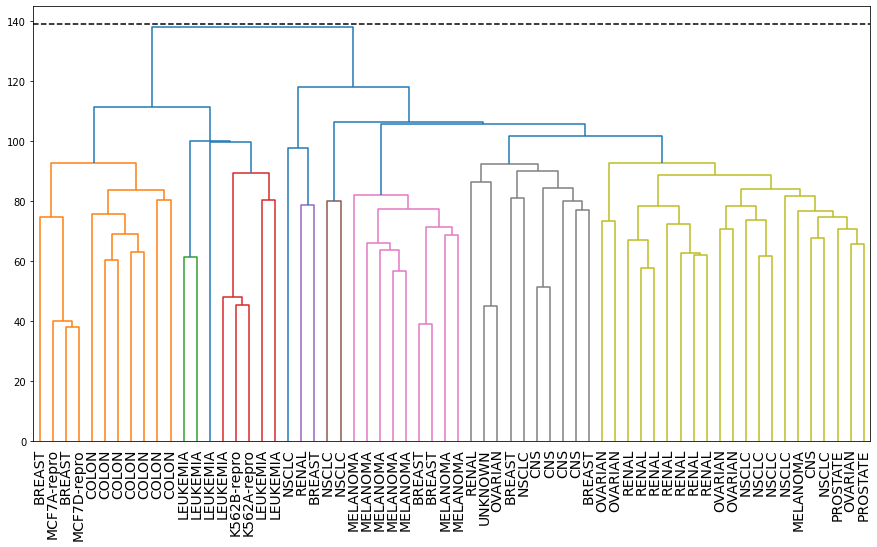

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
dendrogram(nci_hc_complete,
           labels=nci_data.index,
           leaf_font_size=14,
           show_leaf_counts=True)

plt.axhline(y=139, c='k', ls='dashed')
plt.show()


In [19]:
from scipy.cluster.hierarchy import fcluster
fcluster(nci_hc_complete_4_clusters.T[0],4, criterion='maxclust')
pd.crosstab(index=nci_data.index,
            columns=nci_hc_complete_4_clusters.T[0],
            rownames=['Cancer Type'],
            colnames=['Cluster'])


TypeError: Linkage matrix 'Z' must contain doubles.

5. K-Means Clustering

In [17]:
from sklearn.cluster import KMeans
kmean_4 = KMeans(n_clusters=4, random_state=123, n_init=150)
kmean_4.fit(nci_data)
kmean_4.labels_


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
pd.crosstab(index=kmean_4.labels_,
            columns=nci_hc_complete_4_clusters.T[0],
            rownames=['K-Means'],
            colnames=['Hierarchical'])


Hierarchical,0,1
K-Means,,
0,0,7
1,9,0
2,28,0
3,8,12
